# HRH Lab: Processing data

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from scipy.io import wavfile
from importlib import reload

#project code
import data_info as di

In [174]:
vol_neck = di.mean_neck - di.data_m
vol_top = di.mean_top - di.data_m

In [236]:
v = 343.4 # m/s
A = np.pi*(1e-2)**2 # 1 cm in diameter pi r^2
#L = 9e-2 + 0.96* np.sqrt(A)# approximate
L = 9e-2 
ml_m = 1e-6 # m/mL

def f_est(V_mL):
    return v/(2*np.pi) * np.sqrt(A/(V_mL*ml_m*L))

## going through datafiles

want to find resonance and Q factor for all files, plot

In [173]:
reload(di)

<module 'data_info' from '/Users/clever/111b_working/lab_HRH/data_info.py'>

In [190]:
data_files = [f"data/b12_m{n}.csv" for n in di.data_m]
resonances = np.array([di.f_resonance(csv_f) for csv_f in data_files])

In [191]:
resonances_m = np.hstack((resonances, vol_top.reshape(10,1)))
resonances_m

array([[140.48780488,   5.90255414, 517.        ],
       [156.09756098,   8.04878589, 461.        ],
       [163.90243902,   6.80571659, 405.        ],
       [171.70731707,   5.92035842, 365.        ],
       [187.31707317,   5.324989  , 317.        ],
       [202.92682927,   5.86004435, 267.        ],
       [226.34146341,   5.64749723, 217.        ],
       [265.36585366,   8.95330341, 161.        ],
       [320.        ,  10.95821027, 111.        ],
       [577.56097561,  55.64969608,  47.        ]])

## Plotting to expected

\begin{equation}
    f_r = \frac{v_s}{2 \pi} \sqrt{\frac{A}{V L}}
\end{equation}

speed of sound

vs=(331.3+0.606 1 T)m

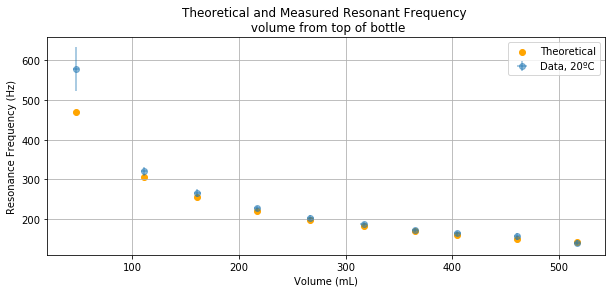

In [215]:
plt.rcParams["figure.figsize"] = (10,4)

plt.errorbar(resonances_m[:,2].T, resonances_m[:,0].T, 
            resonances_m[:,1].T, 3,
             "o", alpha = 0.5, label = "Data, 20ºC")
plt.scatter(vol_top, f_est(vol_top), color = "orange", label = "Theoretical")
#plt.scatter(vol_neck, f_est(vol_neck), label = "Neck volume")

plt.ylabel("Resonance Frequency (Hz)")
plt.xlabel("Volume (mL)")
plt.title(f"Theoretical and Measured Resonant Frequency \n volume from top of bottle")
plt.legend()
plt.grid()
plt.savefig("plot/room_res.png", dpi=300)
plt.show()

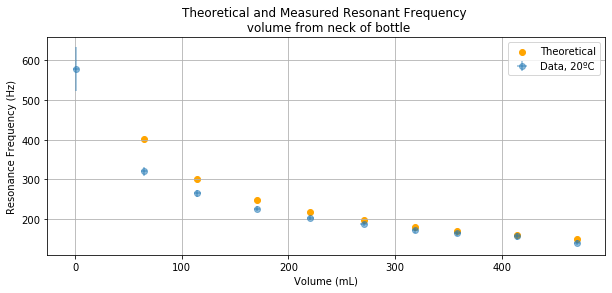

In [214]:
plt.rcParams["figure.figsize"] = (10,4)

plt.errorbar(vol_neck, resonances_m[:,0].T, 
            resonances_m[:,1].T, 3,
             "o", alpha = 0.5, label = "Data, 20ºC")
plt.scatter(vol_neck[:-1], f_est(vol_neck[:-1]), color = "orange", label = "Theoretical")
#plt.scatter(vol_neck, f_est(vol_neck), label = "Neck volume")

plt.ylabel("Resonance Frequency (Hz)")
plt.xlabel("Volume (mL)")
plt.title(f"Theoretical and Measured Resonant Frequency \n volume from neck of bottle")
plt.legend()
plt.grid()
plt.savefig("plot/room_res_neck.png", dpi=300)
plt.show()

## Chi values

In [216]:
ms = resonances_m[:,0]
exp = f_est(vol_top)
unc = resonances_m[:,1].T
df = 9
di.hand_chisquared_r(ms, exp, unc, df)

1.2631103282566176

In [217]:
ms = resonances_m[:-1,0]
exp = f_est(vol_neck)[:-1]
unc = resonances_m[:-1,1].T
df = 9
di.hand_chisquared_r(ms, exp, unc, df)

11.208659928103147

## Fitting

In [242]:
# fitting the inverse sqrt
reload(di)

lin_V = np.sqrt( 1/resonances_m[:,2].T)

# data's best fit
f1_a, f1_a_err, f1_b, f1_b_err = di.Linear_tot(lin_V, resonances_m[:,0])
y_fit = di.Linear(lin_V, f1_a, f1_b)

# Theoretical line of best fit
th_a, th_b = di.Linear_Fit(np.sqrt(1/vol_top), f_est(vol_top))

print(f1_a, f1_a_err, f1_b, f1_b_err)

4174.305996211507 148.04876446384148 -49.9571571828903 11.208500778938047


In [249]:
di.Linear_tot(lin_V, f_est(vol_top))

array([3.22904505e+03, 1.02685598e-06, 2.01445981e-07, 7.77413856e-08])

In [250]:
(3.22904505e+03 - 4174.305996211507)/3.22904505e+03

-0.29273699548152987

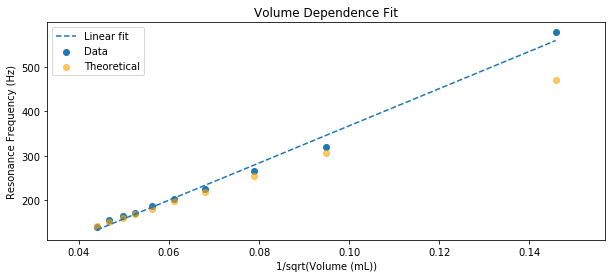

In [252]:
plt.rcParams["figure.figsize"] = (10,4)

plt.scatter(np.sqrt( 1/resonances_m[:,2].T), resonances_m[:,0], label = "Data")
plt.scatter(np.sqrt(1/vol_top), f_est(vol_top), alpha = 0.6, color = "orange", label = "Theoretical")
plt.plot(lin_V, y_fit, "--", label = "Linear fit")

plt.ylabel("Resonance Frequency (Hz)")
plt.xlabel("1/sqrt(Volume (mL))")
plt.title(f"Volume Dependence Fit")
plt.legend()
plt.savefig("plot/lin_fit.png", dpi=300)
plt.show()

# COLD

In [184]:
reload(di)
vol_top_c = di.mean_top - di.cold

In [232]:
def f_est_v0(V_mL):
    v = 331 # m/s
    return v/(2*np.pi) * np.sqrt(A/(V_mL*ml_m*L))

In [199]:
data_files_c = [f"data/c12_m{n}.csv" for n in di.cold]
resonances_c = np.array([di.f_resonance(csv_f) for csv_f in data_files_c])

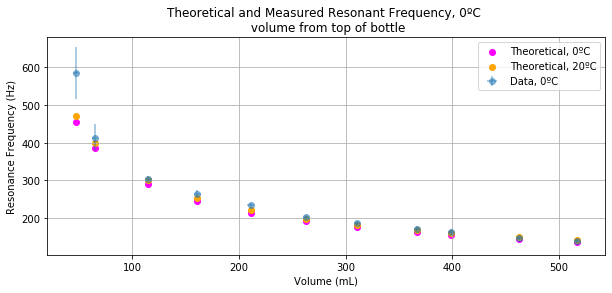

In [237]:
plt.rcParams["figure.figsize"] = (10,4)


plt.errorbar(vol_top_c, resonances_c[:,0].T, 
            resonances_c[:,1].T, 3,
             "o", alpha = 0.5, label = "Data, 0ºC")

plt.scatter(vol_top_c, f_est_v0(vol_top_c), color = "magenta", label = "Theoretical, 0ºC")
plt.scatter(vol_top_c, f_est(vol_top_c), color = "orange", label = "Theoretical, 20ºC")

plt.ylabel("Resonance Frequency (Hz)")
plt.xlabel("Volume (mL)")
plt.title(f"Theoretical and Measured Resonant Frequency, 0ºC \n volume from top of bottle")
plt.legend()
plt.grid()
plt.savefig("plot/cold_res.png", dpi=300)
plt.show()

In [238]:
ms = resonances_c[:,0]
exp = f_est_v0(vol_top_c)
unc = resonances_c[:,1].T
df = 9
di.hand_chisquared_r(ms, exp, unc, df)

3.809066220392562

In [239]:
ms = resonances_c[:,0]
exp = f_est(vol_top_c)
unc = resonances_c[:,1].T
df = 9
di.hand_chisquared_r(ms, exp, unc, df)

1.0539831810121594

In [241]:
# fitting the inverse sqrt
reload(di)

lin_V = np.sqrt( 1/vol_top_c)

# data's best fit
f2_a, f2_a_err, f2_b, f2_b_err = di.Linear_tot(lin_V, resonances_c[:,0])
y2_fit = di.Linear(lin_V, f1_a, f1_b)

# Theoretical line of best fit
thc_a, thc_b = di.Linear_Fit(np.sqrt(1/vol_top_c), f_est(vol_top_c))

print(f2_a, f2_a_err, f2_b, f2_b_err)

3999.9078023778125 209.9418826362824 -42.71942658790228 17.06165717484539


In [243]:
f1_a / f2_a

1.0436005534252615

In [246]:
(1.036 - 1.0436005534252615 )/ 1.036

-0.007336441530175142